In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random

import pickle
import warnings
warnings.filterwarnings('ignore')
import re
from tqdm import tqdm
from nltk.corpus import stopwords
import random

import nltk
from pre_processing import load_df_and_features

In [13]:
df_raw = load_df_and_features("")

In [14]:
df_raw.columns

Index(['original_text', 'label', 'aoa', 'concrete_score', 'verb2',
       'conc_unknown', 'aoa_perc_known_lem', 'conc_total', 'syllable_per_word',
       'conc_mean_score', 'dale_chall_score', 'conc_subtlex_score'],
      dtype='object')

In [10]:
# df['len'] = df['original_text'].apply(len)
# df = df.drop('len',1)

### Consider whether to scale the features

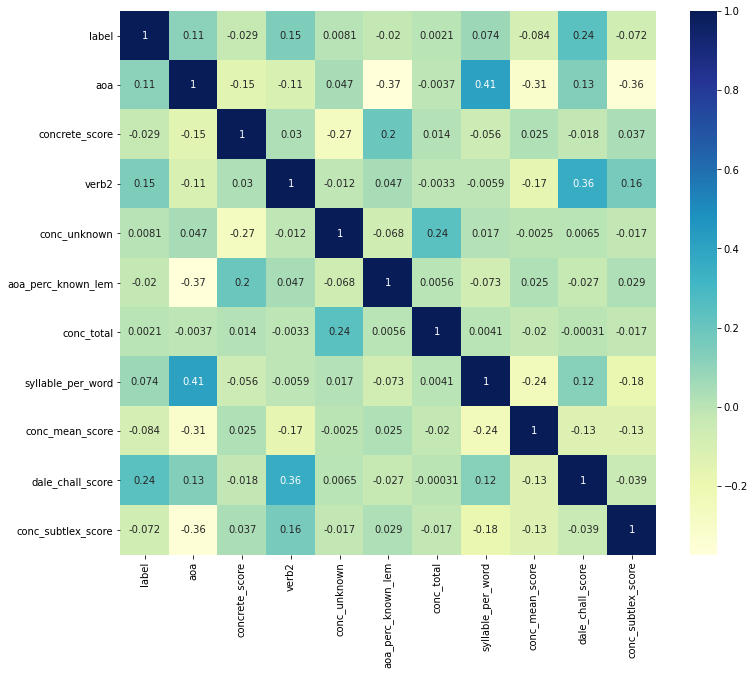

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df_raw.corr(), annot=True, cmap="YlGnBu");

In [16]:
df = df_raw.sample(10000, random_state=42)

In [17]:
df_raw.columns

Index(['original_text', 'label', 'aoa', 'concrete_score', 'verb2',
       'conc_unknown', 'aoa_perc_known_lem', 'conc_total', 'syllable_per_word',
       'conc_mean_score', 'dale_chall_score', 'conc_subtlex_score'],
      dtype='object')

In [18]:
num_features = ['aoa', 'concrete_score', 'verb2',
                'conc_unknown', 'aoa_perc_known_lem', 'conc_total', 'syllable_per_word',
                'conc_mean_score', 'dale_chall_score', 'conc_subtlex_score']

In [19]:
from sklearn.preprocessing import StandardScaler

# for mlp & svm
sc = StandardScaler()
df[num_features] = sc.fit_transform(df[num_features])

In [20]:
from sklearn.model_selection import train_test_split


X = df[num_features].to_numpy()
y = df['label']

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,y,test_size=0.2, random_state=42)

# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(150), random_state=1, max_iter=300).fit(Train_X, Train_Y)
mlp_predict = mlp.predict(Test_X)

In [26]:
accuracy_score(Test_Y, mlp_predict)*100, f1_score(Test_Y, mlp_predict)*100

(65.55, 66.79518072289157)

In [28]:
import pickle

pickle.dump(mlp, open('trained_models/mlp_11simplefeat.pkl','wb'))
# reloaded_clf = pickle.load(open('drive/MyDrive/Milestone2/trained_models/mlp_simple6feat.pkl','rb'))
# mlp_predict = reloaded_clf.predict(Test_X)
# accuracy_score(Test_Y, mlp_predict), f1_score(Test_Y, mlp_predict)

# SVM

In [24]:
from sklearn import svm

SVM = svm.SVC(C=0.5, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X, Train_Y)
predictions_SVM = SVM.predict(Test_X)

In [25]:
from sklearn.metrics import f1_score, accuracy_score

acc = accuracy_score(predictions_SVM, Test_Y)*100
f1 = f1_score(predictions_SVM, Test_Y)*100
acc, f1

(65.2, 63.900414937759344)

In [27]:
import pickle

pickle.dump(SVM, open('trained_models/svm_11simplefeat.pkl', 'wb'))
# reloaded_svm = pickle.load(open('drive/MyDrive/Milestone2/trained_models/svm_6simplefeat.pkl', 'rb'))
# predictions_SVM = reloaded_svm.predict(Test_X)
# accuracy_score(predictions_SVM, Test_Y)*100, f1_score(predictions_SVM, Test_Y)*100

# Random Forest

In [29]:
# without feature scaling

df = df_raw.sample(10000, random_state=42)
X = df[num_features].to_numpy()
y = df['label']

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,y,test_size=0.2, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap= True,
 max_depth=70,
 max_features='auto',
 min_samples_leaf=4,
 min_samples_split=10,
 n_estimators=800)

rf.fit(Train_X, Train_Y)
rf_preds = rf.predict(Test_X)

In [31]:
from sklearn.metrics import f1_score, accuracy_score

rf_acc = accuracy_score(Test_Y, rf_preds)
rf_f1 = f1_score(Test_Y, rf_preds)
rf_acc, rf_f1

(0.669, 0.682341650671785)

In [32]:
pickle.dump(rf, open('trained_models/randomforest_11simplefeat.pkl', 'wb'))